## Why use scikit-learn?
* It's a Python library with "simple and efficient tools for data mining and data analysis"

In [1]:
from sklearn import svm, datasets, model_selection
import matplotlib.pyplot as plt
import numpy as np

#### Import some datasets that come with sklearn

In [2]:
iris = datasets.load_iris()
house = datasets.load_boston()

## Some teaser functions in sklearn 

### Classification: Let's classify types of flowers based on their physical features!

In [3]:
# what's in the iris dataset?
print(iris.keys())

dict_keys(['DESCR', 'data', 'feature_names', 'target', 'target_names'])


In [4]:
# how many data points and how many features do we have?
print(iris.data.shape)

(150, 4)


In [5]:
# what are our features?
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# what are we classifying?
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [7]:
# labels for targets
np.unique(iris.target)

array([0, 1, 2])

In [8]:
# example of features for one data point
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

#### Define our feature vector and target

In [9]:
# we're going to predict flower type based on their sepal length, sepal width, petal length, and petal width
X = iris.data
y = iris.target

#### Let's split the data into training and test sets

In [10]:
# let's train on 66% of the sample and test on the remaining 33%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=5)

#### Define our classifier

In [11]:
# let's use support vector classification with a linear kernel
clf = svm.SVC(kernel='linear', C=1.0)
# fit to the training data
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Predict on the test data

In [12]:
# predicted labels of y_test 
clf.predict(X_test)

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2,
       1, 2, 2, 0])

In [13]:
# accuracy of classifications
clf.score(X_test,y_test)

0.97999999999999998

### Regression: Let's predict housing prices based on some features!

In [14]:
print(house.keys())

dict_keys(['DESCR', 'data', 'feature_names', 'target'])


In [15]:
print(house.data.shape)

(506, 13)


In [16]:
house.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

#### Define our feature vector and target

In [26]:
X = house.data
y = house.target

#### Let's split the data into training and test sets 

In [27]:
# let's train on 66% of the sample and test on the remaining 33%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=5)

#### Define our classifier

In [28]:
# let's use support vector regression with a linear kernel
clf = svm.SVR(kernel='linear')
# fit to the training data
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predict on our test data

In [29]:
# make the prediction on the test data
y_pred = clf.predict(X_test)
# accuracy of classifications
print('R2 of the prediction: ',clf.score(X_test,y_test))

R2 of the prediction:  0.64874410859


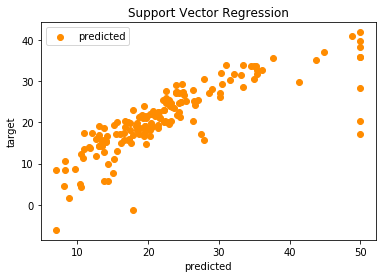

In [30]:
plt.scatter(y_test, y_pred, color='darkorange', label='predicted')
plt.xlabel('predicted')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()